# Rolling and Expanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
%matplotlib inline

In [2]:
from pandas_datareader import data

df = data.DataReader('GOOG', start='2004', end='2020', data_source='yahoo')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


## Rolling with Aggregation

In [3]:
df.rolling(window=7).mean().head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-25,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-26,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-27,54.281540,51.472070,52.731634,52.871823,1.772550e+07,52.871823
2004-08-30,54.383301,51.902599,53.107369,52.990663,1.206123e+07,52.990663
2004-08-31,54.001162,52.020727,53.199168,52.567962,9.489571e+06,52.567962


Visualziation

Text(0.5, 1.0, 'Google Close Price of 2019')

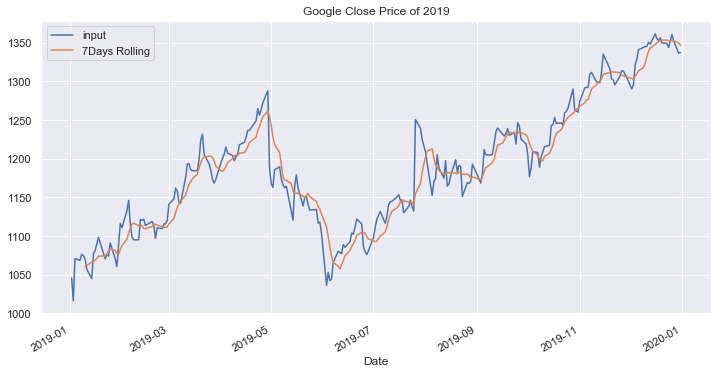

In [14]:
df2 = df[df.index.year == 2019 ]
df2['Close'].plot(figsize=(12,6))
df2['Close'].rolling(window=7).mean().plot()
plt.legend(['input', '7Days Rolling'])
plt.title('Google Close Price of 2019')

Rollng average is lagging.

## Expanding
take into account everything from the start of the time series up to each point in time

In [16]:
df['Close'].expanding(min_periods=30).mean().head(31)

Date
2004-08-19          NaN
2004-08-20          NaN
2004-08-23          NaN
2004-08-24          NaN
2004-08-25          NaN
2004-08-26          NaN
2004-08-27          NaN
2004-08-30          NaN
2004-08-31          NaN
2004-09-01          NaN
2004-09-02          NaN
2004-09-03          NaN
2004-09-07          NaN
2004-09-08          NaN
2004-09-09          NaN
2004-09-10          NaN
2004-09-13          NaN
2004-09-14          NaN
2004-09-15          NaN
2004-09-16          NaN
2004-09-17          NaN
2004-09-20          NaN
2004-09-21          NaN
2004-09-22          NaN
2004-09-23          NaN
2004-09-24          NaN
2004-09-27          NaN
2004-09-28          NaN
2004-09-29          NaN
2004-09-30    55.211886
2004-10-01    55.561259
Name: Close, dtype: float64

Text(0.5, 1.0, 'Google Close Price of 2019')

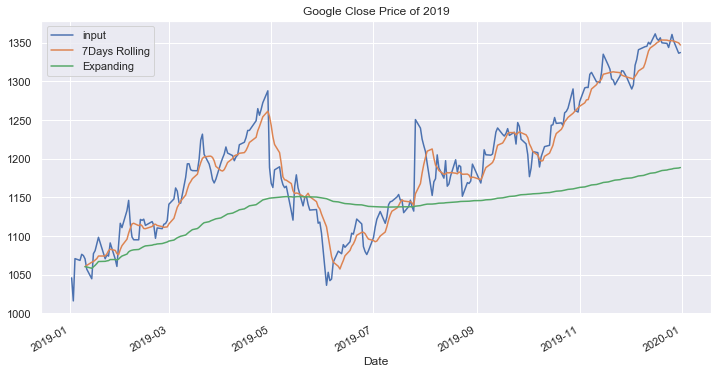

In [17]:
df2 = df[df.index.year == 2019 ]
df2['Close'].plot(figsize=(12,6))
df2['Close'].rolling(window=7).mean().plot()
df2['Close'].expanding(min_periods = 7).mean().plot()
plt.legend(['input', '7Days Rolling', 'Expanding'])
plt.title('Google Close Price of 2019')

picture of the "stability" or "volatility" of a stock